<a href="https://colab.research.google.com/github/AsherV77/Dissertation/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Accuracy from the confusion matrix: 0.93125


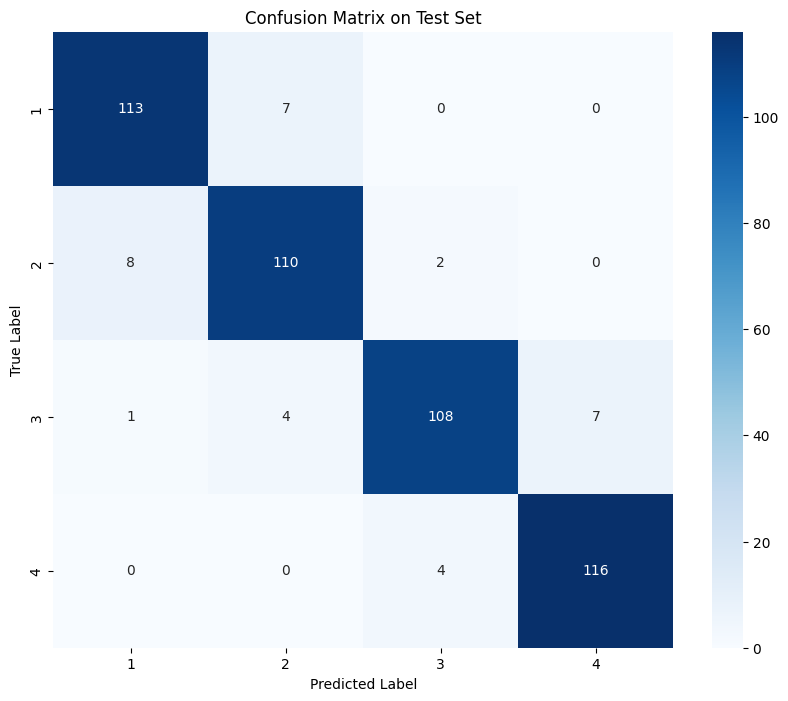

In [ ]:
# Machine Learning models developed for my dissertation
# Here is all the different iterations of XGBoost models I used, testing with different data splitting, tuning and post processing steps
# to get the optimal accuracy and runtime, aiming for a model capable of real-time and accurate analysis

#Code version 1
#5 Fold Cross Validation

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'

# Load the dataset
df = pd.read_csv(file_path)

# Handle the non-numeric target variable using label encoding
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])
y = df['Road_Surface_Type'].values  # Ensure y is a numpy array

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Select features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Convert DataFrame to numpy array for X as well

# Initialize the XGBClassifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform cross-validation and get predictions
predictions = cross_val_predict(xgb, X, y, cv=5)

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the mean accuracy from the confusion matrix
mean_accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print(f"Mean Accuracy from the confusion matrix: {mean_accuracy}")



Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated score:  0.9375
Mean Accuracy from the confusion matrix: 0.9375


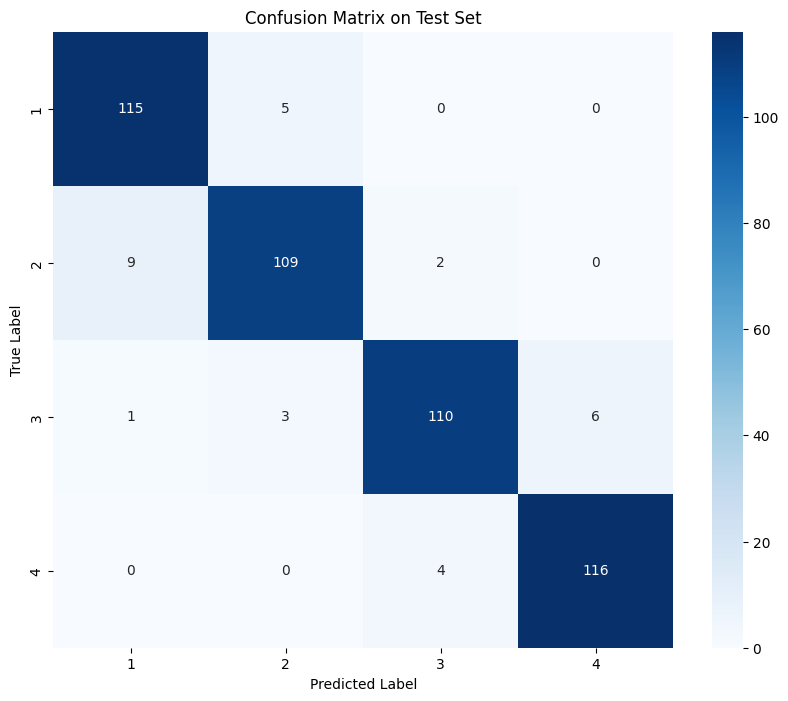

In [ ]:
# Code Version 1.1
# Extreme Gradient Boosting (XGBoost)
#5 Fold Cross Validation
#Hyperparameter Tuning

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'

# Load the dataset
df = pd.read_csv(file_path)

# Handle the non-numeric target variable using label encoding
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])
y = df['Road_Surface_Type'].values  # Ensure y is a numpy array

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Select features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Convert DataFrame to numpy array for X as well

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validated score: ", best_score)

# To use the best model from grid search directly:
best_model = grid_search.best_estimator_

# Get cross-validated predictions with the best model
predictions = cross_val_predict(best_model, X, y, cv=5)

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the mean accuracy from the confusion matrix
mean_accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print(f"Mean Accuracy from the confusion matrix: {mean_accuracy}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated score:  0.9375
Mean Accuracy from the confusion matrix with 10-fold CV and hyperparameter tuning: 0.9375


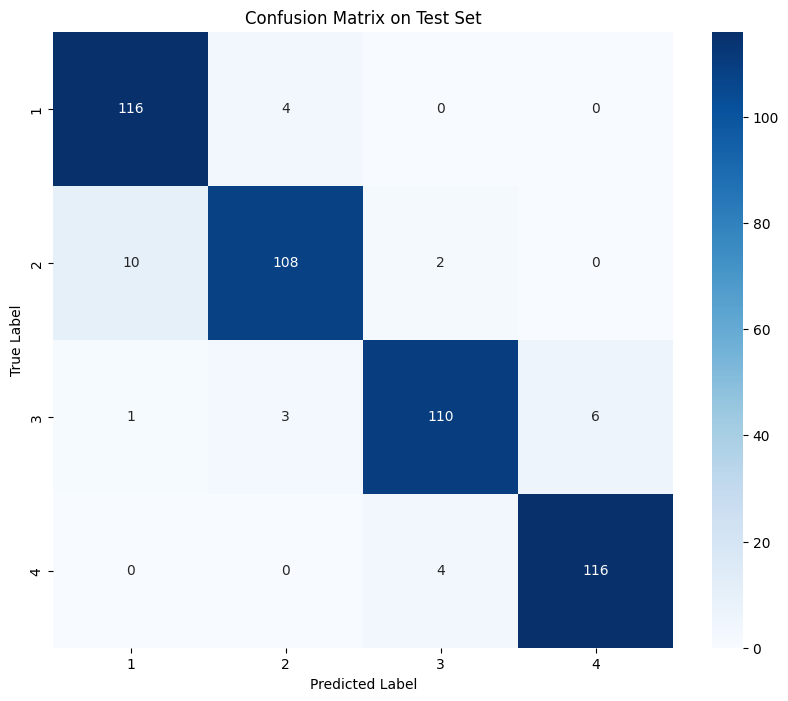

In [ ]:
#Code Version 1.1.1
#with hyperparameter tuning
#10 Fold Cross Validation

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'

# Load the dataset
df = pd.read_csv(file_path)

# Handle the non-numeric target variable using label encoding
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])
y = df['Road_Surface_Type'].values  # Ensure y is a numpy array

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Select features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Convert DataFrame to numpy array for X as well

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validated score: ", best_score)

# To use the best model from grid search directly:
best_model = grid_search.best_estimator_

# Perform cross-validation with the best estimator and get predictions using 10-fold CV
predictions = cross_val_predict(best_model, X, y, cv=10)

# Confusion matrix
conf_matrix = confusion_matrix(y, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the mean accuracy from the confusion matrix
mean_accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
print(f"Mean Accuracy from the confusion matrix with 10-fold CV and hyperparameter tuning: {mean_accuracy}")

In [ ]:
#Code version 1.2
#5 Fold Cross Validation
#Post Processing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from scipy.signal import medfilt

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encoding the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Ensuring X is a numpy array
y = df['Road_Surface_Type'].values  # Ensuring y is a numpy array

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Evaluate the model using K-Fold cross-validation before post-processing
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pre_processed_accuracies = []
post_processed_accuracies = []

for train_index, test_index in kf.split(X_imputed):
    # Split data into training and test sets
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    xgb.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = xgb.predict(X_test)

    # Evaluate accuracy before post-processing
    pre_accuracy = accuracy_score(y_test, predictions)
    pre_processed_accuracies.append(pre_accuracy)

    # Apply post-processing with a median filter to predictions
    smoothed_predictions = medfilt(predictions, kernel_size=5)

    # Evaluate accuracy after post-processing
    post_accuracy = accuracy_score(y_test, smoothed_predictions)
    post_processed_accuracies.append(post_accuracy)

# Calculate mean accuracies
mean_accuracy_before = np.mean(pre_processed_accuracies)
mean_accuracy_after = np.mean(post_processed_accuracies)

print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")




Mean Accuracy before post-processing: 0.9479166666666666
Mean Accuracy after post-processing: 0.9770833333333334


Mean Accuracy before post-processing: 0.95
Mean Accuracy after post-processing: 0.9895833333333334


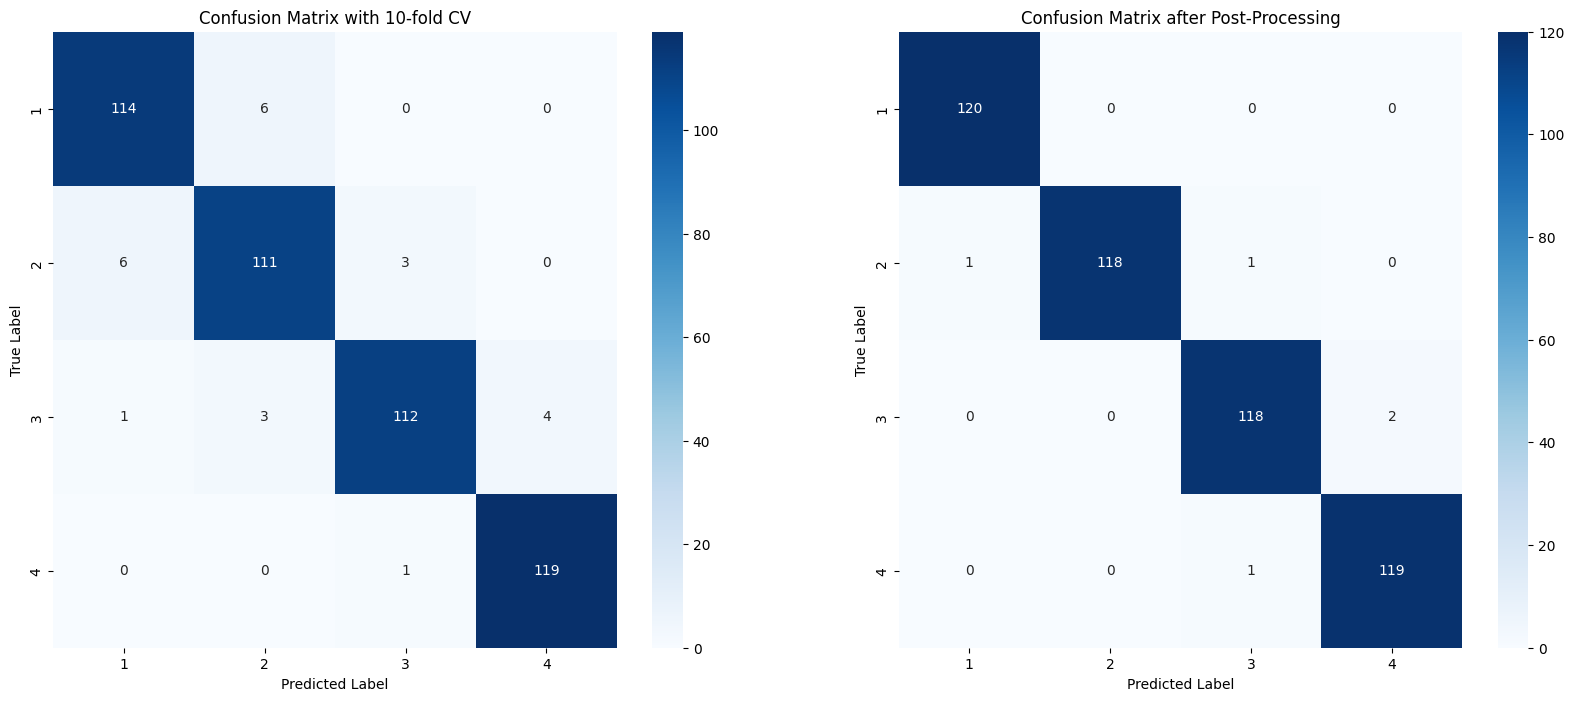

In [ ]:
#Code version 1.2.1
#10 Fold Cross Validation
#Post processing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (data loading and model training code remains the same)

# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Evaluate the model using K-Fold cross-validation before post-processing
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Get cross-validated predictions
predictions = cross_val_predict(xgb, X_imputed, y, cv=kf)

# Apply post-processing with a median filter to predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the mean accuracy before and after post-processing
mean_accuracy = accuracy_score(y, predictions)
post_accuracy = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy before post-processing: {mean_accuracy}")
print(f"Mean Accuracy after post-processing: {post_accuracy}")

# Generate confusion matrices
conf_matrix = confusion_matrix(y, predictions)
conf_matrix_post = confusion_matrix(y, smoothed_predictions)

# Plot both matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Confusion matrix before post-processing
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[0].set_title('Confusion Matrix with 10-fold CV')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix after post-processing
sns.heatmap(conf_matrix_post, annot=True, fmt="d", cmap="Blues", ax=ax[1],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[1].set_title('Confusion Matrix after Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.show()


Mean Accuracy before post-processing: 0.9520833333333333
Mean Accuracy after post-processing: 0.9916666666666667


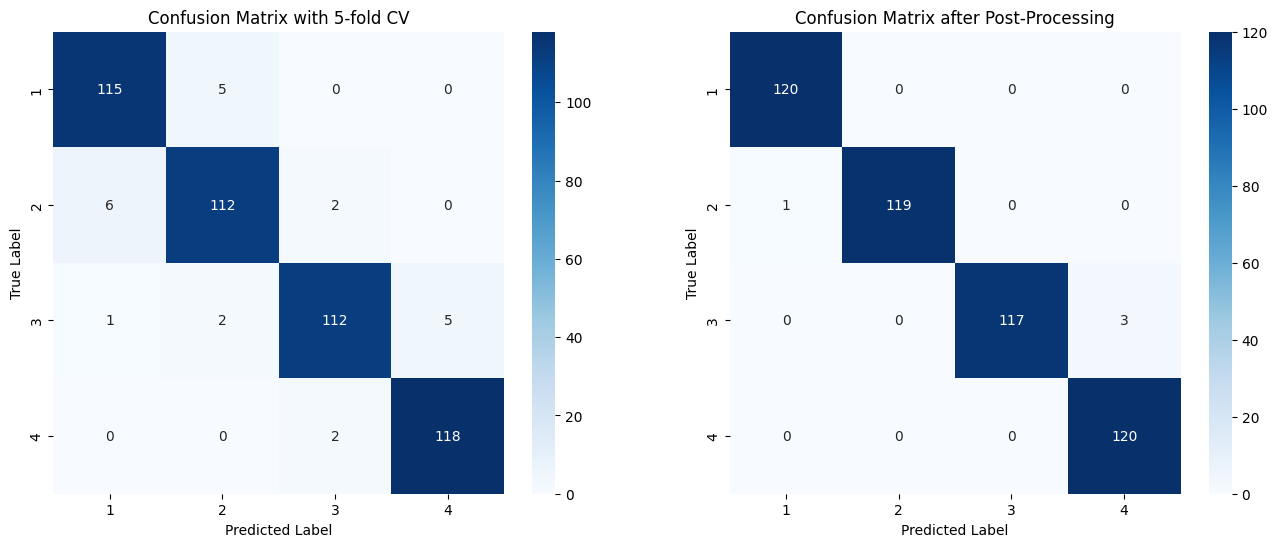

In [ ]:
#XG Boost
#Code version 1.3
#5 fold cross validation
#Hyperparameter tuning
#Post processing

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import seaborn as sns

# Perform K-Fold CV and get predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(best_model, X_imputed, y, cv=kf)

# Apply post-processing with a median filter to predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the mean accuracy before and after post-processing
mean_accuracy_before = accuracy_score(y, predictions)
mean_accuracy_after = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Generate confusion matrices
conf_matrix = confusion_matrix(y, predictions)
conf_matrix_post = confusion_matrix(y, smoothed_predictions)

# Plot both matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix before post-processing
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[0].set_title('Confusion Matrix with 5-fold CV')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix after post-processing
sns.heatmap(conf_matrix_post, annot=True, fmt="d", cmap="Blues", ax=ax[1],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[1].set_title('Confusion Matrix after Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.show()


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Mean Accuracy before post-processing: 0.94375
Mean Accuracy after post-processing: 0.9854166666666667


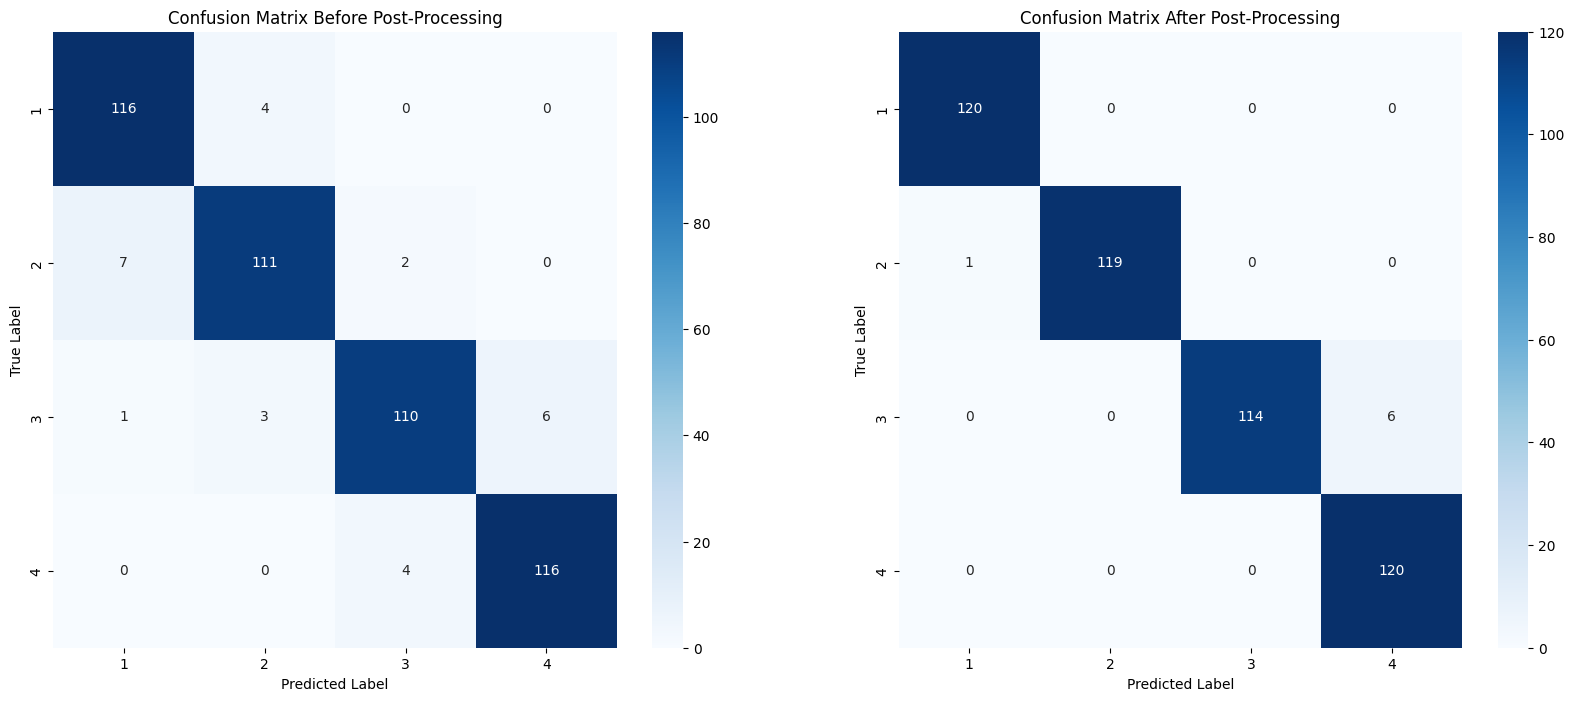

In [ ]:
#XGBoost
#Code version 1.3.1
#10 Fold Cross Validation
#Hyperparameter tuning
#Post processing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encoding the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Ensuring X is a numpy array
y = df['Road_Surface_Type'].values  # Ensuring y is a numpy array

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate the grid search model with 10-fold CV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_imputed, y)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best hyperparameters:", best_params)

# Get cross-validated predictions with the best model using 10-fold CV
predictions = cross_val_predict(best_model, X_imputed, y, cv=10)

# Apply post-processing with a median filter to predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the mean accuracy before and after post-processing
mean_accuracy_before = accuracy_score(y, predictions)
mean_accuracy_after = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Generate confusion matrices
conf_matrix_before = confusion_matrix(y, predictions)
conf_matrix_after = confusion_matrix(y, smoothed_predictions)

# Plot both matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Confusion matrix before post-processing
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[0].set_title('Confusion Matrix Before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix after post-processing
sns.heatmap(conf_matrix_after, annot=True, fmt="d", cmap="Blues", ax=ax[1],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[1].set_title('Confusion Matrix After Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.show()




Mean Accuracy: 0.93125


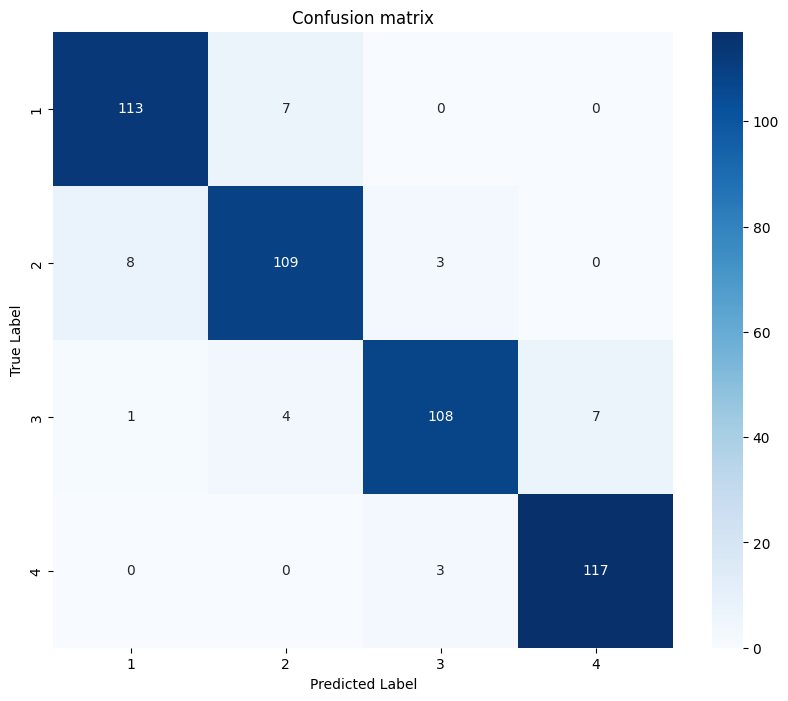

In [ ]:
#10 Fold Cross Validation

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encoding the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Ensuring X is a numpy array
y = df['Road_Surface_Type'].values  # Ensuring y is a numpy array

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the XGBClassifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Get cross-validated predictions using 10-fold CV
predictions = cross_val_predict(xgb, X_imputed, y, cv=10)

# Confusion matrix and plotting
conf_matrix = confusion_matrix(y, predictions)

# Calculate and print the mean accuracy from the confusion matrix
mean_accuracy = accuracy_score(y, predictions)
print(f"Mean Accuracy: {mean_accuracy}")

# Using Seaborn's heatmap to plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



Test Set Accuracy: 0.90625


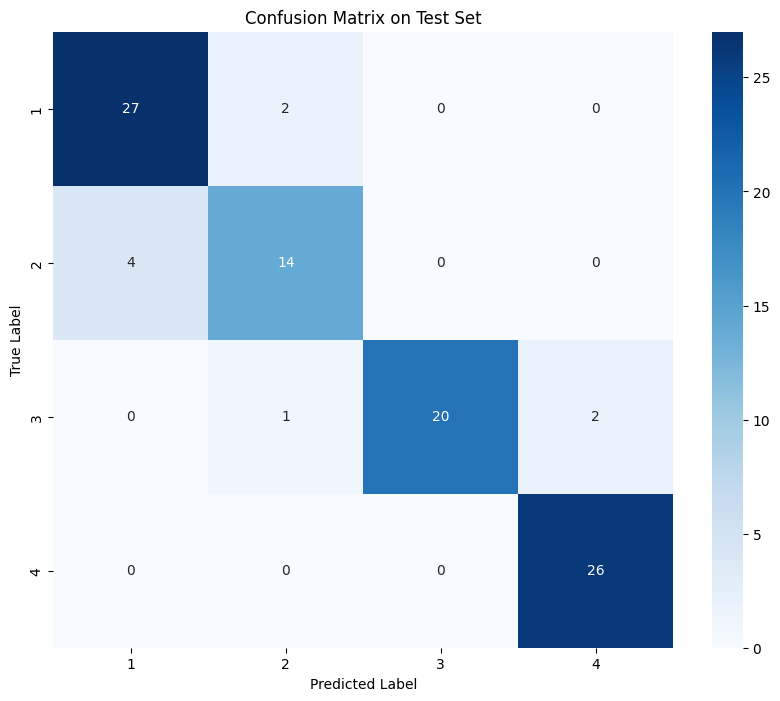

In [ ]:
#80/20 Training testing split

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encoding the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Ensuring X is a numpy array
y = df['Road_Surface_Type'].values  # Ensuring y is a numpy array

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Using Seaborn's heatmap to plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



Test Set Accuracy before post-processing: 0.90625
Test Set Accuracy after post-processing: 0.4583333333333333


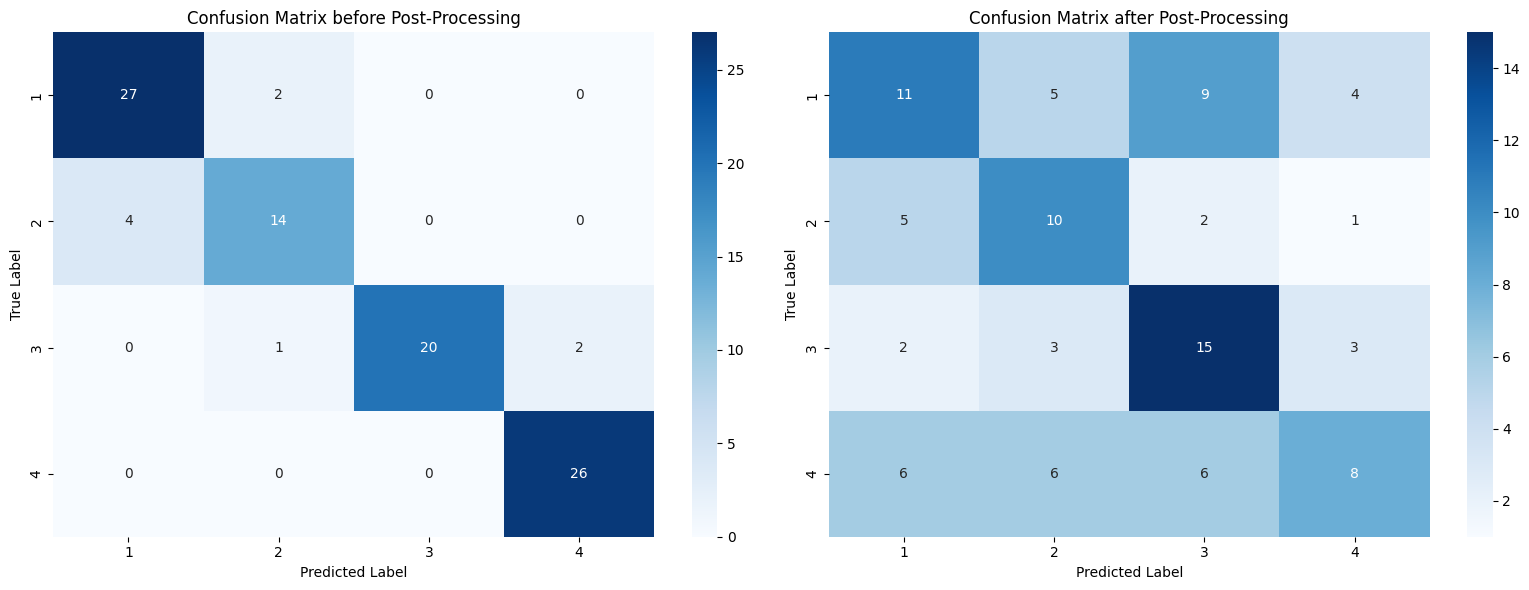

In [ ]:
#80/20 Training Testing split
#Post processing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encoding the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values  # Ensuring X is a numpy array
y = df['Road_Surface_Type'].values  # Ensuring y is a numpy array

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Apply post-processing with a median filter to the predictions
y_pred_smoothed = medfilt(y_pred, kernel_size=3)

# Calculate and print the accuracy on the test set before and after post-processing
accuracy_before = accuracy_score(y_test, y_pred)
accuracy_after = accuracy_score(y_test, y_pred_smoothed)
print(f"Test Set Accuracy before post-processing: {accuracy_before}")
print(f"Test Set Accuracy after post-processing: {accuracy_after}")

# Generate the confusion matrices before and after post-processing
conf_matrix_before = confusion_matrix(y_test, y_pred)
conf_matrix_after = confusion_matrix(y_test, y_pred_smoothed)

# Plot both matrices side by side using Seaborn's heatmap
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix before post-processing
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[0].set_title('Confusion Matrix before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix after post-processing
sns.heatmap(conf_matrix_after, annot=True, fmt="d", cmap="Blues", ax=ax[1],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[1].set_title('Confusion Matrix after Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()



Test Set Accuracy before post-processing: 0.90625
Test Set Accuracy after post-processing: 0.4583333333333333


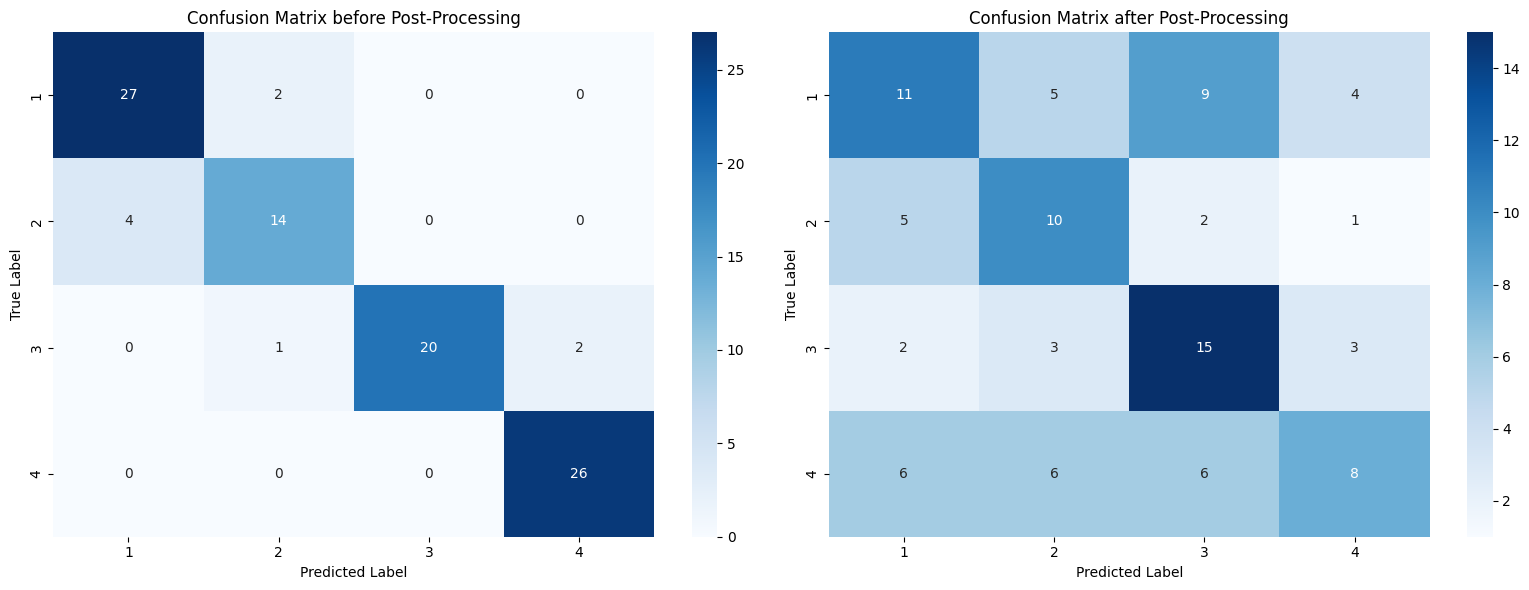

In [ ]:
#80/20
#hyperparameter tuning
#post processing

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Encode the 'Road_Surface_Type' with LabelEncoder
le = LabelEncoder()
df['Road_Surface_Type'] = le.fit_transform(df['Road_Surface_Type'])

# Select features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features].values

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y = df['Road_Surface_Type'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Apply post-processing with a median filter to the predictions
y_pred_smoothed = medfilt(y_pred, kernel_size=3)

# Calculate and print the accuracy on the test set before and after post-processing
accuracy_before = accuracy_score(y_test, y_pred)
accuracy_after = accuracy_score(y_test, y_pred_smoothed)
print(f"Test Set Accuracy before post-processing: {accuracy_before}")
print(f"Test Set Accuracy after post-processing: {accuracy_after}")

# Generate the confusion matrices before and after post-processing
conf_matrix_before = confusion_matrix(y_test, y_pred)
conf_matrix_after = confusion_matrix(y_test, y_pred_smoothed)

# Plot both matrices side by side using Seaborn's heatmap
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix before post-processing
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", ax=ax[0],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[0].set_title('Confusion Matrix before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix after post-processing
sns.heatmap(conf_matrix_after, annot=True, fmt="d", cmap="Blues", ax=ax[1],
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
ax[1].set_title('Confusion Matrix after Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()
